In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loaded the tennis dataset
tennis= pd.read_excel("tennis.xlsx")
tennis

,X,tourney_id,tourney_name,surface,tourney_date,match_date,match_num,round,best_of,gender,...,loser_aces,loser_double_faults,loser_service_points,loser_first_serves_in,loser_first_serves_won,loser_second_serves_won,loser_break_points_saved,loser_break_points_faced,loser_sets,loser_games
0,1,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1123,R128,5,male,...,13.0,3.0,147.0,77.0,55.0,33.0,4.0,12.0,2.0,20.0
1,2,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1153,R128,5,male,...,5.0,3.0,91.0,49.0,31.0,21.0,8.0,12.0,0.0,9.0
2,3,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1118,R128,5,male,...,12.0,11.0,167.0,100.0,62.0,33.0,12.0,18.0,1.0,19.0
3,4,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1116,R128,5,male,...,0.0,5.0,177.0,101.0,63.0,43.0,10.0,17.0,2.0,25.0
4,5,2019-520,Roland Garros,Clay,27/05/2019,27/05/2019,1151,R128,5,male,...,7.0,4.0,122.0,75.0,52.0,33.0,7.0,10.0,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,4568,2023-560,Us Open,Hard,28/08/2023,02/09/2023,225,SF,5,male,...,5.0,5.0,102.0,72.0,43.0,14.0,9.0,14.0,0.0,11.0
4568,4569,2023-560,Us Open,Hard,28/08/2023,02/09/2023,225,SF,3,female,...,5.0,3.0,110.0,76.0,47.0,16.0,7.0,10.0,1.0,18.0
4569,4570,2023-560,Us Open,Hard,28/08/2023,02/09/2023,224,SF,3,female,...,2.0,2.0,72.0,42.0,22.0,14.0,5.0,10.0,0.0,9.0
4570,4571,2023-560,Us Open,Hard,28/08/2023,03/09/2023,226,F,5,male,...,6.0,6.0,106.0,69.0,49.0,14.0,3.0,6.0,0.0,12.0


In [ ]:
# Dropped the duplicates
tennis = tennis.drop_duplicates()

In [ ]:
# Calculated the number of NaN values for each variable
nan_counts = tennis.isnull().sum()

# Calculated the percentage of NaN values for each variable and stored the results in a dataframe
total_rows = len(tennis)
nan_percentages = (nan_counts / total_rows) * 100
nan_summary = pd.DataFrame({'NaN Count': nan_counts, 'NaN Percentage': nan_percentages})

# Summary results
print("NaN Summary for each variable in the tennis dataset:")
print(nan_summary)

NaN Summary for each variable in the tennis dataset:
                           NaN Count  NaN Percentage
X                                  0        0.000000
tourney_id                         0        0.000000
tourney_name                       0        0.000000
surface                            0        0.000000
tourney_date                       0        0.000000
match_date                         0        0.000000
match_num                          0        0.000000
round                              0        0.000000
best_of                            0        0.000000
gender                             0        0.000000
winner_id                          0        0.000000
winner_seed                     2197       48.053368
winner_rank                        7        0.153106
winner_name                        0        0.000000
winner_age                         0        0.000000
winner_rating_score              129        2.821522
winner_serve_ability             129        2.

## **1. Pick a player who has played over 50 matches**

In [ ]:
# Grouped the players based on winner or loser name
players = pd.concat([tennis['winner_name'], tennis['loser_name']])

# Counted the occurrences of each player
player_counts = players.value_counts()

# Filtered players who have appeared more than 50 times
players_over_50_matches = player_counts[player_counts > 50]

# Output the list of players who played over 50 matches along with their number of games
list_players = players_over_50_matches.reset_index().rename(columns={'index': 'Player', '': 'Games Played'})

print("List of players who played over 50 matches with the number of games they played:")
print(list_players)


List of players who played over 50 matches with the number of games they played:
                Player  count
0       Novak Djokovic    103
1          Iga Swiatek     81
2      Daniil Medvedev     77
3     Alexander Zverev     74
4      Aryna Sabalenka     69
5         Rafael Nadal     69
6   Stefanos Tsitsipas     67
7           Ons Jabeur     65
8        Andrey Rublev     64
9        Elise Mertens     63
10   Matteo Berrettini     60
11          Cori Gauff     60
12      Jessica Pegula     56
13   Diego Schwartzman     55
14        Madison Keys     55
15     Karen Khachanov     55
16     Elina Svitolina     54
17      Elena Rybakina     54
18       Jannik Sinner     54
19   Karolina Pliskova     53
20    Karolina Muchova     53
21         Casper Ruud     51
22       Maria Sakkari     51


Player picked: Ons Jabeur

In [ ]:
# Picked the player Ons Jabeur
player_name = 'Ons Jabeur'

# Filtered the dataset for matches where the player is either the winner or the loser
player_matches = tennis[(tennis['winner_name'] == player_name) | (tennis['loser_name'] == player_name)]

# Calculated the following:
# number of games
num_games = len(player_matches)

# number of wins
num_wins = len(player_matches[player_matches['winner_name'] == player_name])

# number of losses
num_losses = len(player_matches[player_matches['loser_name'] == player_name])

#Win -loss record
win_loss_record = num_wins / num_games

print(f"Player: {player_name}")
print(f"Number of games: {num_games}")
print(f"Number of wins: {num_wins}")
print(f"Number of losses: {num_losses}")
print(f"Win-loss record: {win_loss_record:.2f}")


Player: Ons Jabeur
Number of games: 65
Number of wins: 48
Number of losses: 17
Win-loss record: 0.74


In [ ]:
# Matches where Ons played considering won and lost games
player_matches = tennis[(tennis['winner_name'] == 'Ons Jabeur') | (tennis['loser_name'] == 'Ons Jabeur')]

# Calculated the total number of games played, won, and lost
num_games_total = len(player_matches)

num_wins = len(player_matches[player_matches['winner_name'] == 'Ons Jabeur'])

num_losses = num_games_total - num_wins

# Grouped the matches by surface and counted the number of wins and losses for each surface
surface_stats = player_matches.groupby('surface').apply(lambda x: pd.Series({'Number of Wins': sum(x['winner_name'] == 'Ons Jabeur'),
                                                                            'Number of Losses': sum(x['loser_name'] == 'Ons Jabeur'),
                                                                            'Number of Games Played': len(x)})).reset_index()

# Calculated the win-loss record for each surface
surface_stats['Win-Loss Record'] = surface_stats['Number of Wins'] / surface_stats['Number of Games Played']

print(surface_stats)


  surface  Number of Wins  Number of Losses  Number of Games Played  \
0    Clay              10                 5                      15   
1   Grass              16                 4                      20   
2    Hard              22                 8                      30   

   Win-Loss Record  
0         0.666667  
1         0.800000  
2         0.733333  


Best Surface: Grass with 80% win loss record

In [ ]:
# Games won by Ons
ons_jabeur_winner_matches = tennis[tennis['winner_name'] == 'Ons Jabeur']

# Calculated the sum of following variables for matches where Ons Jabeur was the winner
ons_jabeur_winner_stats = ons_jabeur_winner_matches[['winner_aces','winner_first_serves_in', 'winner_first_serves_won', 'winner_second_serves_won', 'winner_break_points_saved', 'winner_break_points_faced', 'winner_service_points']].mean()

# Games lost by Ons
ons_jabeur_loser_matches = tennis[tennis['loser_name'] == 'Ons Jabeur']

# Calculated the sum of same variables for matches where Ons Jabeur was the loser
ons_jabeur_loser_stats = ons_jabeur_loser_matches[['loser_aces','loser_first_serves_in', 'loser_first_serves_won', 'loser_second_serves_won', 'loser_break_points_saved', 'loser_break_points_faced', 'loser_service_points']].mean()

print("Ons Jabeur's statistics as winner:")
print(ons_jabeur_winner_stats)

print("\nOns Jabeur's statistics as loser:")
print(ons_jabeur_loser_stats)

# Ratios for won matches
winner_first_serves_won_ratio = ons_jabeur_winner_stats['winner_first_serves_won'] / ons_jabeur_winner_stats['winner_first_serves_in']
winner_break_points_saved_ratio = ons_jabeur_winner_stats['winner_break_points_saved'] / ons_jabeur_winner_stats['winner_break_points_faced']

# Ratios for lost matches
loser_first_serves_won_ratio = ons_jabeur_loser_stats['loser_first_serves_won'] / ons_jabeur_loser_stats['loser_first_serves_in']
loser_break_points_saved_ratio = ons_jabeur_loser_stats['loser_break_points_saved'] / ons_jabeur_loser_stats['loser_break_points_faced']

print("\nOns Jabeur's ratios as winner:")
print("First serves won ratio:", winner_first_serves_won_ratio)
print("Break points saved ratio:", winner_break_points_saved_ratio)

print("\nOns Jabeur's ratios as loser:")
print("First serves won ratio:", loser_first_serves_won_ratio)
print("Break points saved ratio:", loser_break_points_saved_ratio)


Ons Jabeur's statistics as winner:
winner_aces                   4.229167
winner_first_serves_in       38.687500
winner_first_serves_won      27.250000
winner_second_serves_won     17.250000
winner_break_points_saved     3.791667
winner_break_points_faced     6.270833
winner_service_points        71.270833
dtype: float64

Ons Jabeur's statistics as loser:
loser_aces                   4.588235
loser_first_serves_in       41.294118
loser_first_serves_won      25.647059
loser_second_serves_won     12.352941
loser_break_points_saved     4.882353
loser_break_points_faced     9.882353
loser_service_points        72.882353
dtype: float64

Ons Jabeur's ratios as winner:
First serves won ratio: 0.7043618739903069
Break points saved ratio: 0.6046511627906976

Ons Jabeur's ratios as loser:
First serves won ratio: 0.621082621082621
Break points saved ratio: 0.49404761904761907


In [ ]:
# Matches that Ons lost
ons_jabeur_lost_matches = tennis[tennis['loser_name'] == 'Ons Jabeur']

# Number of sets per game
ons_jabeur_lost_matches['sets'] = ons_jabeur_lost_matches['score'].str.split().apply(len)

# Calculated the average number of sets
average_sets_lost = ons_jabeur_lost_matches['sets'].mean()

print("Average number of sets in the games that Ons Jabeur lost:", average_sets_lost)


Average number of sets in the games that Ons Jabeur lost: 2.3529411764705883


<ipython-input-91-a48408987043>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ons_jabeur_lost_matches['sets'] = ons_jabeur_lost_matches['score'].str.split().apply(len)


## **2. Who is the best at serving in each of the men’s & women’s games?**

In [ ]:
# Wrote a function to calculate statistics for each game considering only players with min of 10 games
def calculate_per_game_stats(player_name, player_matches):
    num_matches = len(player_matches)
    if num_matches <= 10:
        return None

    # Calculated average aces, average first serves in, won and second ones won
    per_game_stats = {
        'player_name': player_name,
        'num_games': num_matches,
         'avg_aces': player_matches['winner_aces'].sum() / num_matches,
        'avg_first_serves_in': player_matches['winner_first_serves_in'].mean(),
        'avg_first_serves_won': player_matches['winner_first_serves_won'].sum() / num_matches,
        'avg_second_serves_won': player_matches['winner_second_serves_won'].sum() / num_matches
    }

    return per_game_stats

per_game_stats_list = []

# For each uniue male player calculated the stats
for player_name in tennis[tennis['gender'] == 'male']['winner_name'].unique():
    player_matches = tennis[(tennis['winner_name'] == player_name) | (tennis['loser_name'] == player_name)]
    per_game_stats = calculate_per_game_stats(player_name, player_matches)
    if per_game_stats:
        per_game_stats_list.append(per_game_stats)

# Created the dataframe
per_game_stats_df = pd.DataFrame(per_game_stats_list)

# Chose the best server with highest stats
best_server = per_game_stats_df.nlargest(1, ['avg_first_serves_won', 'avg_aces','avg_second_serves_won'])

print("Best server in men's games based on per game statistics:")
print(best_server)


Best server in men's games based on per game statistics:
             player_name  num_games   avg_aces  avg_first_serves_in  \
138  Christopher Eubanks         15  18.133333                 81.4   

     avg_first_serves_won  avg_second_serves_won  
138                  63.4              22.133333  


In [ ]:
# Same procedure but for female players
per_game_stats_list = []
for player_name in tennis[tennis['gender'] == 'female']['winner_name'].unique():
    player_matches = tennis[(tennis['winner_name'] == player_name) | (tennis['loser_name'] == player_name)]
    per_game_stats = calculate_per_game_stats(player_name, player_matches)

    if per_game_stats:
        per_game_stats_list.append(per_game_stats)

per_game_stats_df = pd.DataFrame(per_game_stats_list)

best_server = per_game_stats_df.nlargest(1, ['avg_aces','avg_first_serves_won', 'avg_second_serves_won'])

print("Best server in women's games based on per game statistics:")
print(best_server)

Best server in women's games based on per game statistics:
          player_name  num_games  avg_aces  avg_first_serves_in  \
27  Karolina Pliskova         53  6.981132            45.132075   

    avg_first_serves_won  avg_second_serves_won  
27             33.339623               12.45283  


In [ ]:
# Filtered for only the games that Karolina played
karolina_matches = tennis[(tennis['loser_name'] == 'Karolina Pliskova')| (tennis['winner_name'] == 'Karolina Pliskova')]
# Number of sets for each game
karolina_matches['sets'] = karolina_matches['score'].str.split().apply(len)

# Calculated the average number of sets
average_sets_lost = karolina_matches['sets'].mean()

print("Average number of sets in the games that Karolina Pliskova played:", average_sets_lost)


Average number of sets in the games that Karolina Pliskova played: 2.2452830188679247


<ipython-input-94-973f5522400e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karolina_matches['sets'] = karolina_matches['score'].str.split().apply(len)


In [ ]:
# Filtered for only the games John Isner played
john_matches = tennis[(tennis['loser_name'] == 'John Isner')| (tennis['winner_name'] == 'John Isner')]
# Number of sets for each game
john_matches['sets'] = john_matches['score'].str.split().apply(len)

# Calculated the average number of sets
average_sets_lost = john_matches['sets'].mean()

print("Average number of sets in the games that John Isner played:", average_sets_lost)


Average number of sets in the games that John Isner played: 3.7666666666666666


<ipython-input-95-79d9d77a6b52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  john_matches['sets'] = john_matches['score'].str.split().apply(len)


In [ ]:
# Followed the exact same code and procedure to identify top male and female players but this time chose the top 10 best instead of only 1
male_per_game_stats_list = []

for player_name in tennis[tennis['gender'] == 'male']['winner_name'].unique():
    player_matches = tennis[((tennis['winner_name'] == player_name) | (tennis['loser_name'] == player_name)) & (tennis['gender'] == 'male')]

    per_game_stats = calculate_per_game_stats(player_name, player_matches)

    if per_game_stats:
        male_per_game_stats_list.append(per_game_stats)

male_per_game_stats_df = pd.DataFrame(male_per_game_stats_list)

# Identified the top 10 male servers based on per game statistics instead of only 1
top_male_servers = male_per_game_stats_df.nlargest(10, ['avg_aces','avg_first_serves_won', 'avg_second_serves_won'])

print("Top 10 male servers based on per game statistics:")
print(top_male_servers)

female_per_game_stats_list = []

for player_name in tennis[tennis['gender'] == 'female']['winner_name'].unique():
    player_matches = tennis[((tennis['winner_name'] == player_name) | (tennis['loser_name'] == player_name)) & (tennis['gender'] == 'female')]

    per_game_stats = calculate_per_game_stats(player_name, player_matches)

    if per_game_stats:
        female_per_game_stats_list.append(per_game_stats)

female_per_game_stats_df = pd.DataFrame(female_per_game_stats_list)

# Identified the top 10 female servers based on per game statistics instead of 1
top_female_servers = female_per_game_stats_df.nlargest(10, ['avg_aces','avg_first_serves_won', 'avg_second_serves_won'])

print("\nTop 10 female servers based on per game statistics:")
print(top_female_servers)

Top 10 male servers based on per game statistics:
             player_name  num_games   avg_aces  avg_first_serves_in  \
73          Nick Kyrgios         30  20.366667            76.103448   
67            John Isner         30  18.433333            80.448276   
106        Maxime Cressy         18  18.388889            74.388889   
138  Christopher Eubanks         15  18.133333            81.400000   
69        Kevin Anderson         16  17.375000            74.500000   
77           Sam Querrey         19  17.315789            66.105263   
108        Soon Woo Kwon         21  16.666667            77.904762   
72          Milos Raonic         18  16.611111            64.222222   
33           Marin Cilic         37  16.081081            68.135135   
75         Reilly Opelka         25  16.040000            70.240000   

     avg_first_serves_won  avg_second_serves_won  
73              58.200000              21.000000  
67              62.933333              23.300000  
106            

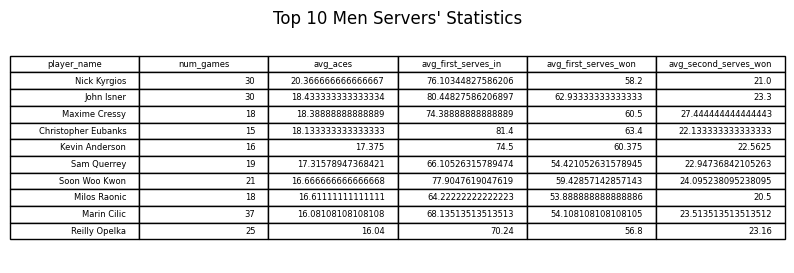

In [ ]:
# Made a table visualization for top 10 men servers
def create_table_visualization(df, title):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    ax.set_title(title)
    plt.show()


create_table_visualization(top_male_servers, "Top 10 Men Servers' Statistics")


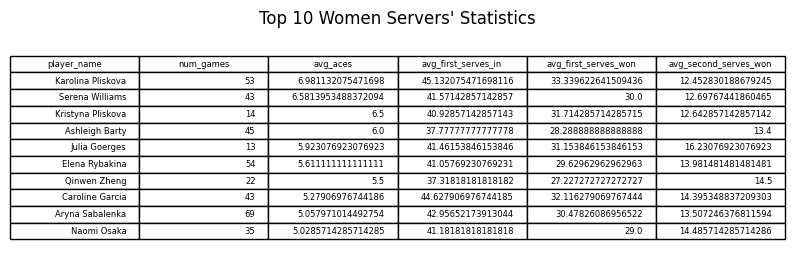

In [ ]:
# Made the same table visualization for top 10 women servers
create_table_visualization(top_female_servers, "Top 10 Women Servers' Statistics")

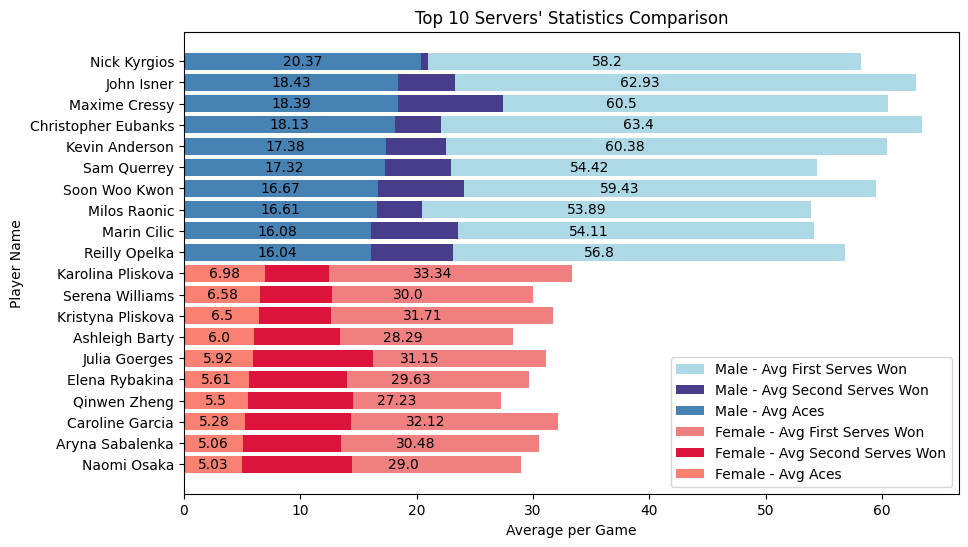

In [ ]:
# wrote a function to group everything I wanted in my barplot considering gender, colors, top 20 players, numbers listed and legend
def plot_combined_per_game_stats(df_male, df_female, title):
    plt.figure(figsize=(10, 6))

    # Plotted the bars for male players
    plt.barh(df_male['player_name'], df_male['avg_first_serves_won'], color='lightblue', label='Male - Avg First Serves Won')
    plt.barh(df_male['player_name'], df_male['avg_second_serves_won'], color='darkslateblue', label='Male - Avg Second Serves Won')
    plt.barh(df_male['player_name'], df_male['avg_aces'], color='steelblue', label='Male - Avg Aces')

    # Plotted the bars for female players
    plt.barh(df_female['player_name'], df_female['avg_first_serves_won'], color='lightcoral', label='Female - Avg First Serves Won')
    plt.barh(df_female['player_name'], df_female['avg_second_serves_won'], color='crimson', label='Female - Avg Second Serves Won')
    plt.barh(df_female['player_name'], df_female['avg_aces'], color='salmon', label='Female - Avg Aces')

    # Added the stats numbers in the middle of each bar
    for idx, value in enumerate(df_male['avg_first_serves_won']):
        plt.text(value / 2 + 6, idx, str(round(value, 2)), ha='left', va='center', color='black')



    for idx, value in enumerate(df_male['avg_aces']):
        plt.text(value / 2, idx, str(round(value, 2)), ha='center', va='center', color='black')

    for idx, value in enumerate(df_female['avg_first_serves_won']):
        plt.text(value / 2 + 3, idx + len(df_male), str(round(value, 2)), ha='left', va='center', color='black')


    for idx, value in enumerate(df_female['avg_aces']):
        plt.text(value / 2, idx + len(df_male), str(round(value, 2)), ha='center', va='center', color='black')

    plt.xlabel('Average per Game')
    plt.ylabel('Player Name')
    plt.title(title)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

plot_combined_per_game_stats(top_male_servers, top_female_servers, "Top 10 Servers' Statistics Comparison")


In [ ]:
import pandas as pd

# Created a function that analyzes per game stats that we used earlier but this time based on the surface and gender
def calculate_per_game_stats_surface_gender(player_name, player_matches, surface, gender):
    num_matches = len(player_matches)
    if num_matches <= 10:
        return None

# Filtered based on each surface and made it case insensitive in case some surfaces were written differently
    surface_matches = player_matches[(player_matches['surface'].str.lower() == surface.lower()) & (player_matches['gender'] == gender)]
    num_surface_matches = len(surface_matches)
    if num_surface_matches == 0:
        return None

# Calculated per game statistics for each surface and gender
    per_game_stats = {
        'player_name': player_name,
        'num_games': num_surface_matches,
        'surface': surface,
        'gender': gender,
        'avg_aces': surface_matches['winner_aces'].sum() / num_surface_matches,
        'avg_first_serves_in': surface_matches['winner_first_serves_in'].mean(),
        'avg_first_serves_won': surface_matches['winner_first_serves_won'].sum() / num_surface_matches,
        'avg_second_serves_won': surface_matches['winner_second_serves_won'].sum() / num_surface_matches
    }

    return per_game_stats

# Created a list to store per game statistics for each player on each surface and gender
per_game_stats_surface_gender_list = []

# For each unique plyer, filtered based on each surface and gender and calculated my per game stats
for player_name in tennis['winner_name'].unique():
    player_matches = tennis[(tennis['winner_name'] == player_name) | (tennis['loser_name'] == player_name)]

    for surface in tennis['surface'].unique():
        for gender in ['male', 'female']:
            per_game_stats_surface_gender = calculate_per_game_stats_surface_gender(player_name, player_matches, surface, gender)
            if per_game_stats_surface_gender:
                per_game_stats_surface_gender_list.append(per_game_stats_surface_gender)

# Changed the list into a dataframe
per_game_stats_surface_gender_df = pd.DataFrame(per_game_stats_surface_gender_list)

# Identified the top 10 servers for each surface and gender and output them
top_servers_by_surface_gender = {}
for surface in tennis['surface'].unique():
    top_servers_by_surface_gender[surface] = {}
    for gender in ['male', 'female']:
        top_servers_by_surface_gender[surface][gender] = per_game_stats_surface_gender_df[(per_game_stats_surface_gender_df['surface'].str.lower() == surface.lower()) & (per_game_stats_surface_gender_df['gender'] == gender)].nlargest(10, ['avg_aces', 'avg_first_serves_won', 'avg_second_serves_won'])

for surface, gender_stats in top_servers_by_surface_gender.items():
    for gender, top_servers in gender_stats.items():
        print(f"\nTop 10 {gender} servers on {surface} surface based on per game statistics:")
        print(top_servers)



Top 10 male servers on Clay surface based on per game statistics:
            player_name  num_games surface gender   avg_aces  \
406         Sam Querrey          2    Clay   male  22.500000   
360     Feliciano Lopez          3    Clay   male  16.666667   
378          John Isner          9    Clay   male  14.111111   
499      Frances Tiafoe          8    Clay   male  13.375000   
630       Soon Woo Kwon          5    Clay   male  12.800000   
99          Marin Cilic         11    Clay   male  12.727273   
75   Jan Lennard Struff         11    Clay   male  12.636364   
372         Jiri Vesely          6    Clay   male  12.333333   
603   Brandon Nakashima          4    Clay   male  12.250000   
342       Andrey Rublev         14    Clay   male  12.071429   

     avg_first_serves_in  avg_first_serves_won  avg_second_serves_won  
406            78.000000             62.000000              28.500000  
360            80.333333             62.333333              18.666667  
378         

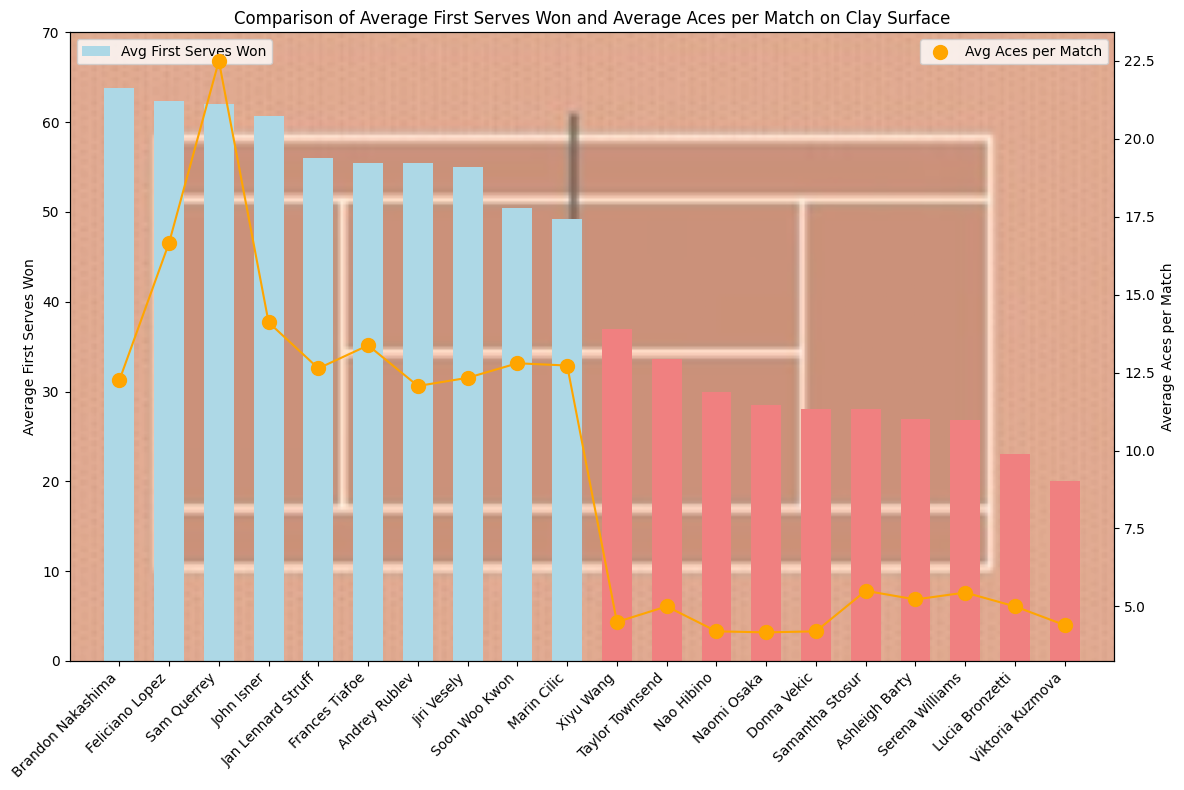

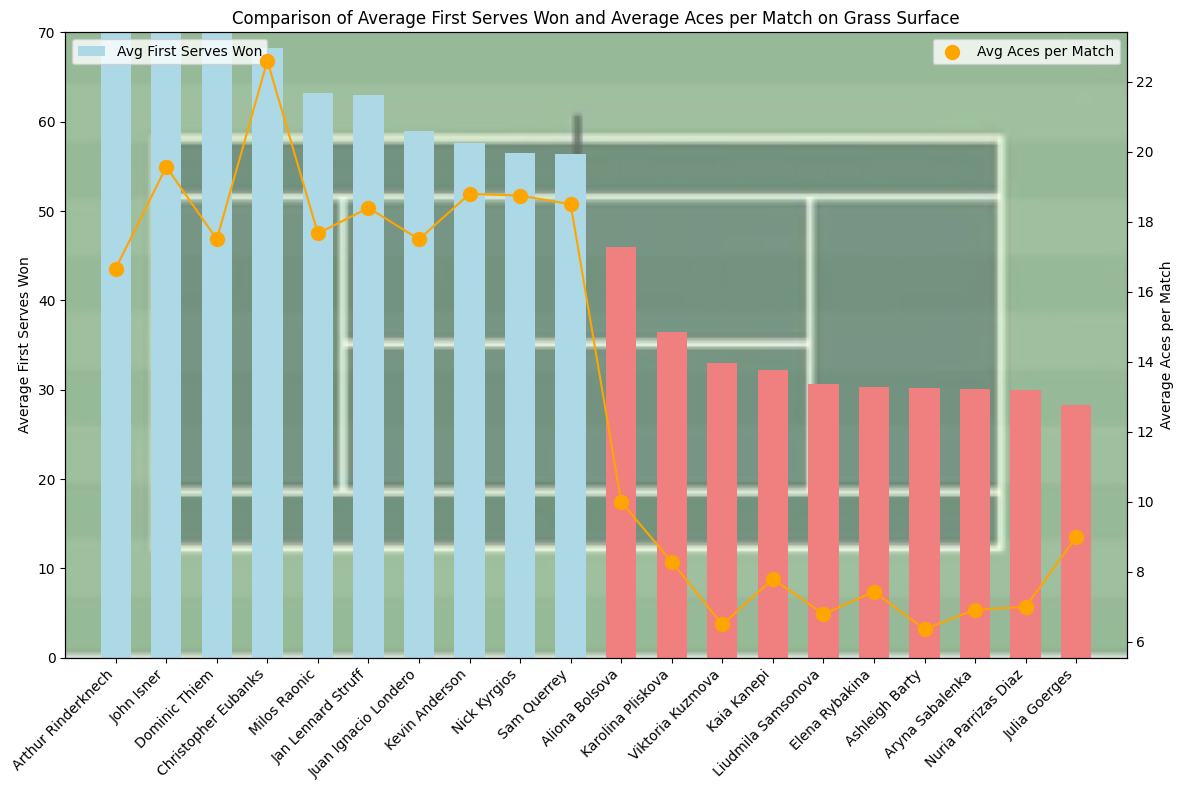

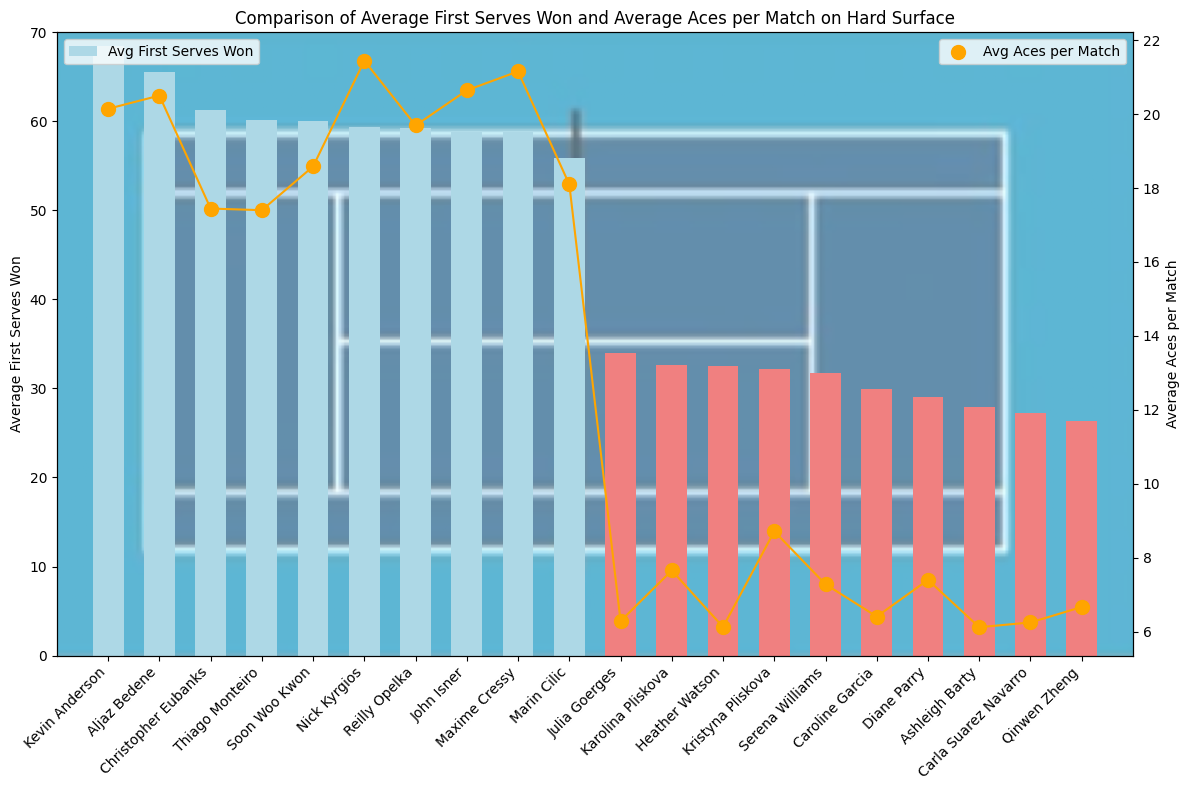

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Wrote a function to create a combined plot for each surface and added some images for each surface for better visualizations
def create_combined_plot(df_male, df_female, surface, image_path):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Used the image
    img = mpimg.imread(image_path)

    # Combined male and female player data for each specified surface
    df_combined = pd.concat([df_male[df_male['surface'].str.lower() == surface.lower()],
                             df_female[df_female['surface'].str.lower() == surface.lower()]]).sort_values(by='avg_first_serves_won', ascending=False)

    if df_combined.empty:
        print(f"No data available for {surface.capitalize()} surface.")
        return

    num_players = len(df_combined)

    # Assigned colors based on gender
    colors = ['lightblue' if gender == 'male' else 'lightcoral' for gender in df_combined['gender']]

    # Created a bar plot for average first serves won
    ax.bar(np.arange(num_players), df_combined['avg_first_serves_won'], color=colors, width=0.6, label='Avg First Serves Won')
    ax.set_ylabel('Average First Serves Won')

    # Created a second y-axis for the scatter plot of average aces per match
    ax2 = ax.twinx()
    ax2.scatter(np.arange(num_players), df_combined['avg_aces'], color='orange', s=100, marker='o', label='Avg Aces per Match')
    ax2.set_ylabel('Average Aces per Match')

    # Connected the average aces per match dots with lines
    for i in range(num_players - 1):
        ax2.plot([i, i + 1], [df_combined.iloc[i]['avg_aces'], df_combined.iloc[i + 1]['avg_aces']], color='orange')

    # Labels and legend
    ax.set_xticks(np.arange(num_players))
    ax.set_xticklabels(df_combined['player_name'], rotation=45, ha='right')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f"Comparison of Average First Serves Won and Average Aces per Match on {surface.capitalize()} Surface")

    # Added the image as a background with adjusted extent to cover the entire plot
    ax.imshow(img, extent=[-1, num_players, 0, 70], aspect='auto', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot for clay surface
create_combined_plot(top_servers_by_surface_gender['Clay']['male'], top_servers_by_surface_gender['Clay']['female'], 'clay', 'clay.png')

# Plot for grass surface
create_combined_plot(top_servers_by_surface_gender['Grass']['male'], top_servers_by_surface_gender['Grass']['female'], 'grass', 'grass.png')

# Plot for hard surface
create_combined_plot(top_servers_by_surface_gender['Hard']['male'], top_servers_by_surface_gender['Hard']['female'], 'hard', 'hard.png')


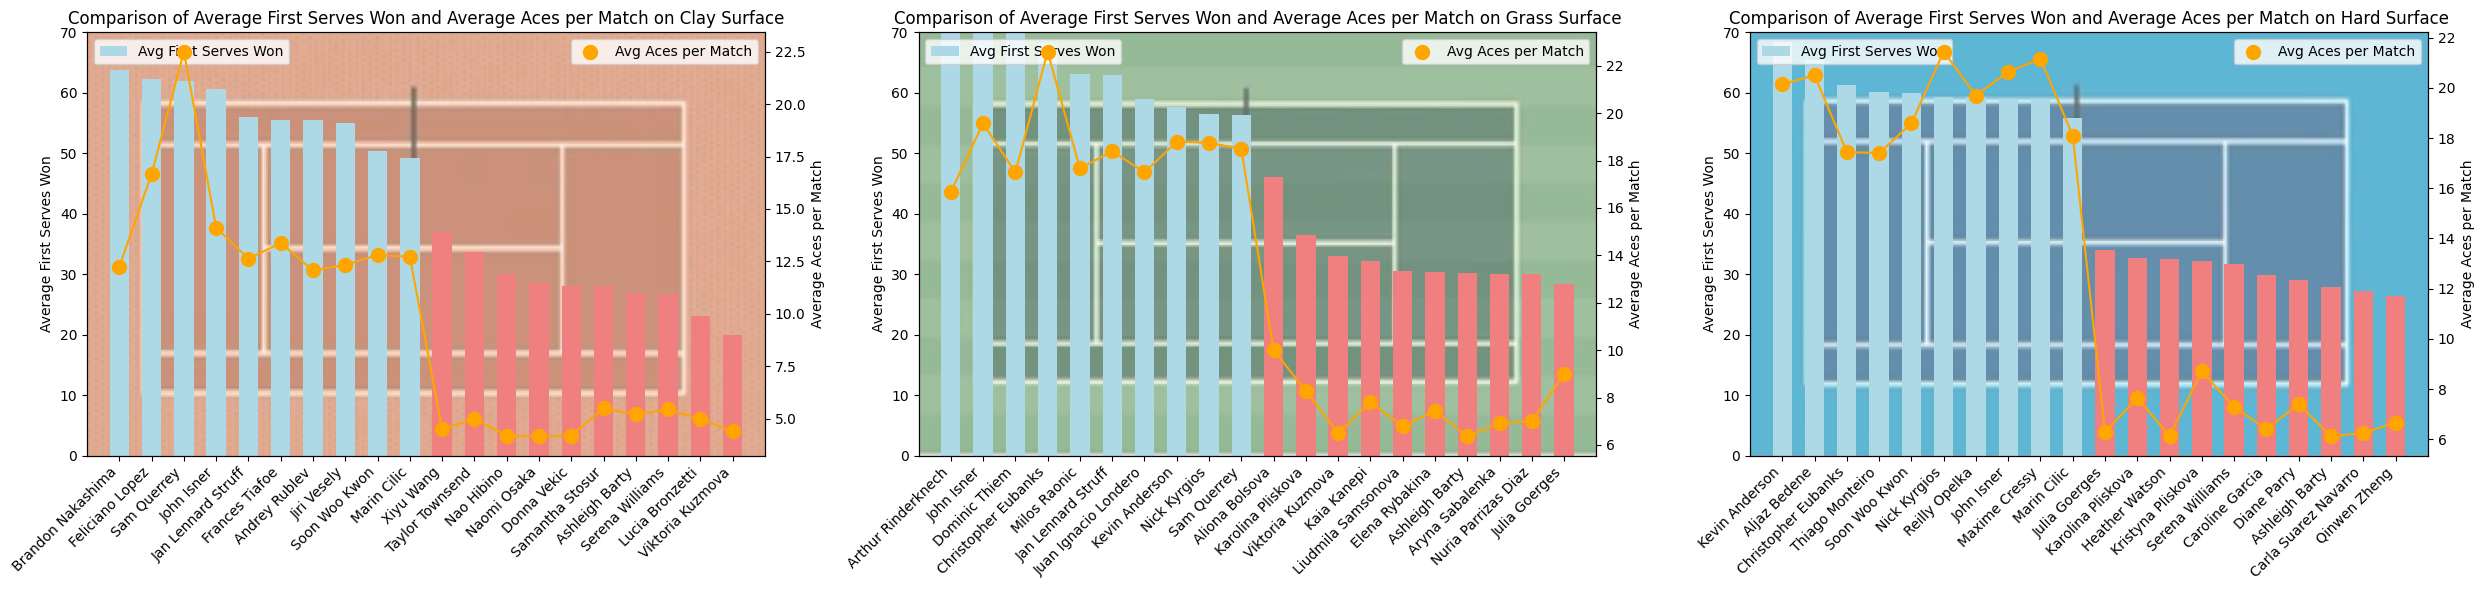

In [ ]:
# Same function used earlier for the plots but this time added an ax to combine them in the same plot
def create_combined_plot(df_male, df_female, surface, image_path, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    else:
        fig = ax.get_figure()

    img = mpimg.imread(image_path)

    df_combined = pd.concat([df_male[df_male['surface'].str.lower() == surface.lower()],
                             df_female[df_female['surface'].str.lower() == surface.lower()]]).sort_values(by='avg_first_serves_won', ascending=False)

    if df_combined.empty:
        print(f"No data available for {surface.capitalize()} surface.")
        return

    num_players = len(df_combined)

    colors = ['lightblue' if gender == 'male' else 'lightcoral' for gender in df_combined['gender']]

    ax.bar(np.arange(num_players), df_combined['avg_first_serves_won'], color=colors, width=0.6, label='Avg First Serves Won')
    ax.set_ylabel('Average First Serves Won')

    ax2 = ax.twinx()
    ax2.scatter(np.arange(num_players), df_combined['avg_aces'], color='orange', s=100, marker='o', label='Avg Aces per Match')
    ax2.set_ylabel('Average Aces per Match')

    for i in range(num_players - 1):
        ax2.plot([i, i + 1], [df_combined.iloc[i]['avg_aces'], df_combined.iloc[i + 1]['avg_aces']], color='orange')

    ax.set_xticks(np.arange(num_players))
    ax.set_xticklabels(df_combined['player_name'], rotation=45, ha='right')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f"Comparison of Average First Serves Won and Average Aces per Match on {surface.capitalize()} Surface")

    ax.imshow(img, extent=[-1, num_players, 0, 70], aspect='auto', alpha=0.7)

    return fig, ax
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

create_combined_plot(top_servers_by_surface_gender['Clay']['male'], top_servers_by_surface_gender['Clay']['female'], 'clay', 'clay.png', ax=axes[0])

create_combined_plot(top_servers_by_surface_gender['Grass']['male'], top_servers_by_surface_gender['Grass']['female'], 'grass', 'grass.png', ax=axes[1])

create_combined_plot(top_servers_by_surface_gender['Hard']['male'], top_servers_by_surface_gender['Hard']['female'], 'hard', 'hard.png', ax=axes[2])

# Plots printed together
plt.tight_layout()
plt.show()


## **3. Build and evaluate a simple model that predicts the number of aces in a given match**





In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Encoded the categorical variables I wanted to add and dropped the ones I didnt need
# Created a number_aces variable as the sum of winner_aces and loser_aces
label_encoder = LabelEncoder()
tennis2 = tennis.copy()

target = 'number_aces'
tennis2[target] = tennis['loser_aces'] + tennis['winner_aces']

# Encoded the categorical variables
categorical_cols = ['surface', 'tourney_id', 'tourney_name', 'tourney_date', 'match_date', 'match_num', 'round', 'winner_name', 'loser_name', 'score', 'gender']
for col in categorical_cols:
    tennis2[col] = label_encoder.fit_transform(tennis2[col])

# Dropped the NaN values and other unnecessary variables
tennis2.dropna(inplace=True)
X = tennis2.drop(['number_aces', 'loser_aces', 'winner_aces', 'loser_seed', 'winner_seed'], axis=1)
y = tennis2['number_aces']

# Trained the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

# Feature Importances
feature_importance = regressor.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                      Feature  Importance
41                loser_games    0.433728
36     loser_first_serves_won    0.138694
3                     surface    0.100002
24       winner_double_faults    0.042293
30  winner_break_points_faced    0.040762
25      winner_service_points    0.029523
10                  winner_id    0.029311
6                   match_num    0.016937
28   winner_second_serves_won    0.016317
0                           X    0.016291
17                 loser_rank    0.011144
12                winner_name    0.010829
38   loser_break_points_saved    0.010101
5                  match_date    0.009820
11                winner_rank    0.009308
18                 loser_name    0.008579
21        loser_serve_ability    0.007942
27    winner_first_serves_won    0.007466
13                 winner_age    0.006890
39   loser_break_points_faced    0.005537
14        winner_rating_score    0.005420
37    loser_second_serves_won    0.005385
4                tourney_date    0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Features chosen based on feature selection technique and target variable
features = ['loser_first_serves_won','loser_games','surface', 'winner_double_faults','winner_serve_ability', 'loser_serve_ability', 'winner_rating_score', 'loser_rating_score']
target = 'number_aces'
tennis[target] = tennis['loser_aces'] + tennis['winner_aces']

# Drop rows with missing values in both features and target variable
tennis.dropna(subset=features+[target], inplace=True)

# Encoded the 'surface' column
label_encoder = LabelEncoder()
tennis['surface'] = label_encoder.fit_transform(tennis['surface'])

# Shuffled the rows to get random selection of different surfaces for train and test data
tennis_shuffled = tennis.sample(frac=1, random_state=42)

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = train_test_split(tennis_shuffled, test_size=0.3, random_state=42)

# Prepared the training and testing features and target variables
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Created a pipeline for preprocessing and modeling, imputing missing values with mean and standardizing features
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Regression model and pipeline to the data
pipeline.fit(X_train, y_train)

# Making predictions on the test data
y_pred = pipeline.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 31.077107897525384
R^2 Score: 0.685669991269287
